# import python libs

In [8]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


# connect to database 

In [9]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [11]:
cur=conn.cursor()

# q1 

In [5]:
sql_q1 = """  
            select * from gp14.student

            """

In [6]:
df = pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,s_major
0,janedoe@jmu.edu,jane doe,bio
1,iansmith@jmu.edu,ian smith,nursing
2,timsmith@jmu.edu,tim smith,history
3,johndoe@jmu.edu,john doe,ia


# q2

In [14]:
q2_sql = """
        select gp14.professor.p_name,
        gp14.course.c_name
        from gp14.professor
        inner join gp14.course
        on gp14.professor.p_email = gp14.course.p_email
        """

In [15]:
df=pandas.read_sql_query(q2_sql,conn)
df[:]

,p_name,c_name
0,orlandrew danzell,national security
1,xuebin wei,data mining
2,tim walton,hypothesis testing
3,p7,c_new_name
4,p7,techinamerica


# q3


In [16]:
q3_sql = """
        select c_number,
        count(c_number) as num_enroll
        from gp14.enroll_list
        group by c_number
        """

In [17]:
df=pandas.read_sql_query(q3_sql,conn)
df[:]

,c_number,num_enroll
0,hist327,4
1,ia200,3
2,ia261,3


<AxesSubplot:xlabel='c_number'>

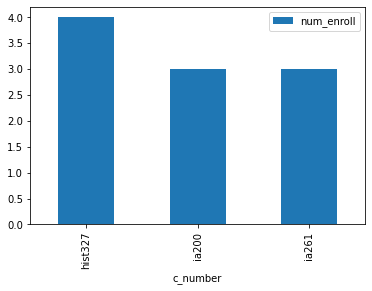

In [18]:
df.plot.bar(x='c_number',y='num_enroll')

# q4

In [21]:
q4_sql = """
        select gp14.professor.p_name,
        count(gp14.course.c_name) as num_course
        from gp14.professor
        inner join gp14.course
        on gp14.professor.p_email = gp14.course.p_email
        group by gp14.professor.p_name
        """

In [22]:
df=pandas.read_sql_query(q4_sql,conn)
df[:]

,p_name,num_course
0,xuebin wei,1
1,tim walton,1
2,p7,2
3,orlandrew danzell,1


<AxesSubplot:xlabel='p_name'>

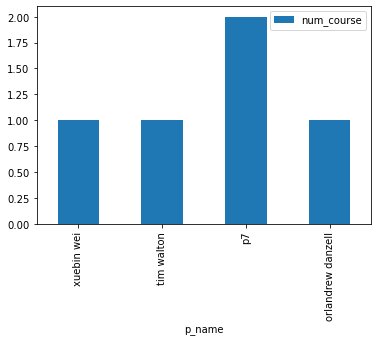

In [23]:
df.plot.bar(x='p_name',y='num_course')

# q5

In [26]:
conn.rollback()

In [27]:
q5_insert_professor_sql = """
            insert into gp14.professor(p_email,p_name,p_number)
            values('{}','{}','{}')
            """.format('new_lab4_email','new_p_lab4_name','new_lab4_o')
print(q5_insert_professor_sql)


            insert into gp14.professor(p_email,p_name,p_number)
            values('new_lab4_email','new_p_lab4_name','new_lab4_o')
            


In [28]:
cur.execute(q5_insert_professor_sql)

In [29]:
conn.commit()

In [30]:
df=pandas.read_sql_query('select * from gp14.professor',conn)
df[:]

,p_email,p_name,p_number
0,weixx@jmu.edu,xuebin wei,isat112
1,waltontr@jmu.edu,tim walton,isat136
2,danzelox@jmu.edu,orlandrew danzell,isat107
3,p7@jmu.edu,p7,isat100
4,new_lab4_email,new_p_lab4_name,new_lab4_o


In [33]:
conn.rollback()

In [34]:
q5_insert_course_sql = """
            insert into gp14.course(c_number,c_name,r_number,p_email)
            values('{}','{}','{}','{}')
            """.format('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
print(q5_insert_course_sql)


            insert into gp14.course(c_number,c_name,r_number,p_email)
            values('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
            


In [35]:
cur.execute(q5_insert_course_sql)


In [36]:
conn.commit()

In [37]:
df=pandas.read_sql_query('select * from gp14.course',conn)
df[:]

,c_number,c_name,r_number,p_email
0,ia200,national security,isat107,danzelox@jmu.edu
1,ia340,data mining,isat336,weixx@jmu.edu
2,ia261,hypothesis testing,isat136,waltontr@jmu.edu
3,c_new_num,c_new_name,c_new_r,p7@jmu.edu
4,hist327,techinamerica,w2022,p7@jmu.edu
5,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


# q6

In [38]:
q6_update_course_sql ="""
                    update gp14.course
                    set p_email = '{}'
                    where p_email ='{}'
                    """.format('new_lab4_email','t2@jmu.edu')


In [39]:

cur.execute(q6_update_course_sql)

In [40]:
conn.commit()

In [41]:
df=pandas.read_sql_query('select * from gp14.course',conn)
df[:]

,c_number,c_name,r_number,p_email
0,ia200,national security,isat107,danzelox@jmu.edu
1,ia340,data mining,isat336,weixx@jmu.edu
2,ia261,hypothesis testing,isat136,waltontr@jmu.edu
3,c_new_num,c_new_name,c_new_r,p7@jmu.edu
4,hist327,techinamerica,w2022,p7@jmu.edu
5,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


In [42]:
q6_delete_professor_sql = """
                            delete from gp14.professor
                            where p_email='{}'
                            """.format('t2@jmu.edu')

In [43]:
cur.execute(q6_delete_professor_sql)

In [44]:
conn.commit()

In [45]:
df=pandas.read_sql_query('select * from gp14.professor',conn)
df[:]

,p_email,p_name,p_number
0,weixx@jmu.edu,xuebin wei,isat112
1,waltontr@jmu.edu,tim walton,isat136
2,danzelox@jmu.edu,orlandrew danzell,isat107
3,p7@jmu.edu,p7,isat100
4,new_lab4_email,new_p_lab4_name,new_lab4_o


# close the cursor and connecction

In [46]:
cur.close()

In [47]:
conn.close()
